# House Price Prediction Analysis Using Multiple Regression Models (OLS, Ridge, Lasso)


### Data Exploration and Quality Assessment
**Objective:** Examine the dataset, basic statistics, missing values, and outliers


#### Dataset *VertexVault_House_Prices2.csv* contains 500 recent home sales with the below features: 

- price: Sale price in thousands of dollars 

- sqft: Total square footage of the house

- bedrooms: Number of bedrooms

- bathrooms: Number of bathrooms

- age: Age of the house in years

- lot_size: Size of the lot in square feet

- school_dist: Distance to nearest school in miles

- park_dist: Distance to nearest park in miles

- condition: House condition rating (1-5, where 5 is excellent)

- garage: Number of garage spaces

- has_basement: Binary indicator for basement (0 = No, 1 = Yes)



In [207]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [208]:
df = pd.read_csv("/Users/faithlucykirabo/Desktop/MSADS Courses/Machine Learning I/Datasets/VertexVault_House_Prices2.csv")
df.head()

,price,sqft,bedrooms,bathrooms,age,lot_size,school_dist,park_dist,condition,garage,has_basement
0,1126,2798,3,2.0,35,14662,1.89,0.41,3,3,1
1,1132,2417,3,4.0,44,7750,0.43,1.01,4,3,0
2,1069,2889,4,1.5,22,6874,1.10,1.46,3,1,1
3,1184,3414,4,3.0,46,9824,1.57,0.57,4,2,1
4,1078,2360,6,3.5,30,2186,2.64,1.32,4,2,0


In [209]:
# Basic Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,500.0,1044.70000,109.871240,758.0,972.0000,1051.000,1116.5000,1411.00
sqft,500.0,2504.08800,588.751755,555.0,2079.7500,2508.000,2881.7500,4812.00
bedrooms,500.0,3.96600,1.422988,2.0,3.0000,4.000,5.0000,6.00
bathrooms,500.0,2.76100,0.853132,1.5,2.0000,3.000,3.5000,4.00
age,500.0,24.20000,14.836990,0.0,11.0000,24.000,37.0000,49.00
lot_size,500.0,8476.58800,2460.648019,1279.0,6876.2500,8576.000,10110.2500,15327.00
school_dist,500.0,1.54570,0.847337,0.1,0.8875,1.515,2.2925,2.99
park_dist,500.0,1.03506,0.541456,0.1,0.5700,1.045,1.4900,1.99
condition,500.0,3.06600,1.391948,1.0,2.0000,3.000,4.0000,5.00
garage,500.0,1.52000,1.104554,0.0,1.0000,2.000,2.0000,3.00


In [210]:
# Missing Values
df.isna().sum()

price           0
sqft            0
bedrooms        0
bathrooms       0
age             0
lot_size        0
school_dist     0
park_dist       0
condition       0
garage          0
has_basement    0
dtype: int64

No missing values on the dataset for all columns.

In [211]:
df.duplicated().sum()

np.int64(0)

No duplicates present in data

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         500 non-null    int64  
 1   sqft          500 non-null    int64  
 2   bedrooms      500 non-null    int64  
 3   bathrooms     500 non-null    float64
 4   age           500 non-null    int64  
 5   lot_size      500 non-null    int64  
 6   school_dist   500 non-null    float64
 7   park_dist     500 non-null    float64
 8   condition     500 non-null    int64  
 9   garage        500 non-null    int64  
 10  has_basement  500 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 43.1 KB


**Insights:**
- Two data types present: float and int
- 500 records in the daatset

In [213]:
# Check outliers
def check_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

all_outliers = {}
for column_name in df.columns:
    current_outliers = check_outliers(df, column_name)
    if not current_outliers.empty:
        all_outliers[column_name] = current_outliers
        print(f"\nOutliers found in column '{column_name}':")
        print(current_outliers)
    else:
        print(f"\nNo outliers found in column '{column_name}'.")




Outliers found in column 'price':
     price  sqft  bedrooms  bathrooms  age  lot_size  school_dist  park_dist  \
31    1376  3611         6        2.5   48     10781         0.45       1.55   
209   1366  4812         4        3.5   49      8162         0.16       1.49   
478   1411  4347         6        3.5   15     14227         0.80       0.24   

     condition  garage  has_basement  
31           5       3             1  
209          5       1             1  
478          3       1             1  

Outliers found in column 'sqft':
     price  sqft  bedrooms  bathrooms  age  lot_size  school_dist  park_dist  \
179   1162  4132         2        2.5   13      9347         1.50       0.20   
209   1366  4812         4        3.5   49      8162         0.16       1.49   
262    834   555         5        3.0   41      4093         2.79       1.38   
478   1411  4347         6        3.5   15     14227         0.80       0.24   

     condition  garage  has_basement  
179          2

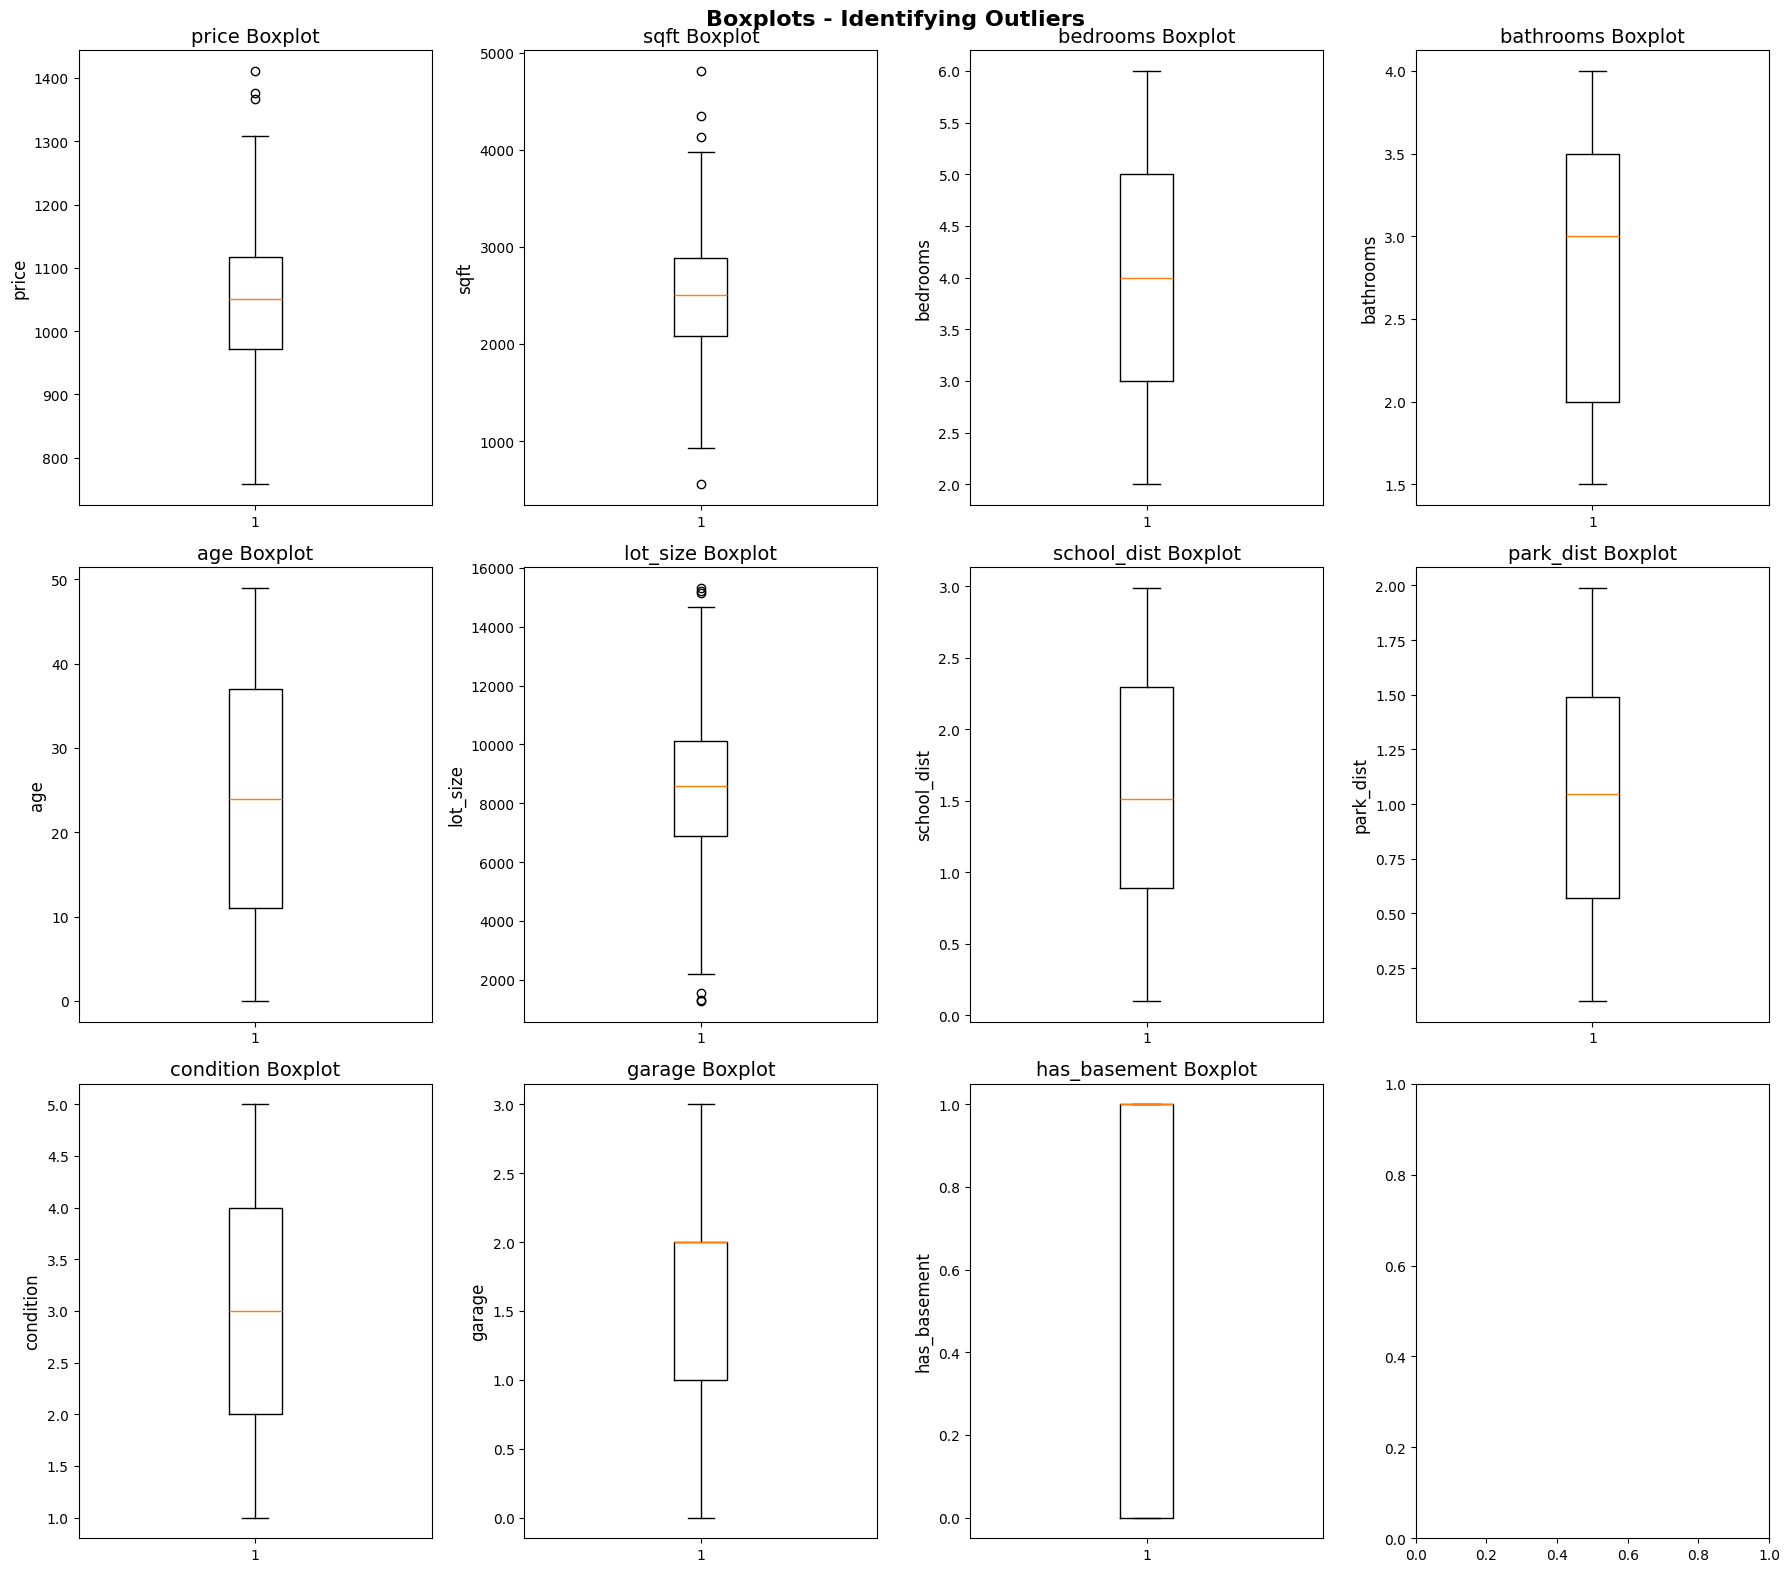

In [214]:
# Visualize Outliers
metrics = df
rows = 3
cols = 4

# Create boxplots to visualize ouliers
fig, axes = plt.subplots(rows, cols, figsize=(18, 16))
fig.suptitle('Boxplots - Identifying Outliers', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    if metric in df.columns:
        ax = axes[idx]
        ax.boxplot(df[metric], vert=True)
        ax.set_ylabel(metric, fontsize=12)
        ax.set_title(f'{metric} Boxplot', fontsize=14)
        # Hide empty subplots
        for j in range(len(metrics), len(axes)):
            axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Price Distribution and Feature Relationships
**Objective:** Visualize and assess price distribution and relationships between price and numerical features


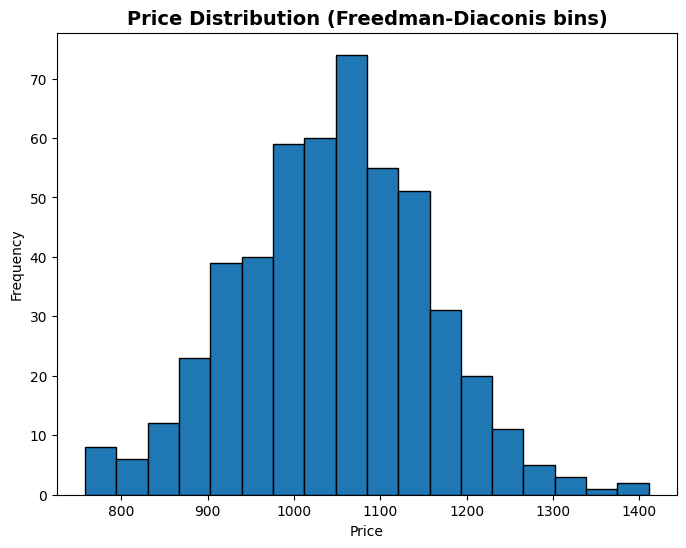

In [215]:
# Price Distribution

plt.figure(figsize=(8,6))
plt.hist(df['price'],bins = 'fd', edgecolor = 'black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Freedman-Diaconis bins)',fontweight='bold', fontsize=14)
plt.show()

This histogram displays the overall distribution of housing prices to assess skewness, spread, and the presence of extreme values.

#### Key observations
- The distribution is moderately right-skewed.
- A longer right tail indicates the presence of higher-priced properties.
- The distribution deviates from perfect symmetry.

Right skewness implies that extreme values may disproportionately influence model estimates and that assumptions of normality may be violated. This justifies consideration of a transformation of the price to log price in order to reduce skew. It also signals potential issues with homoskedasticity and residual normality if raw price is modeled directly.

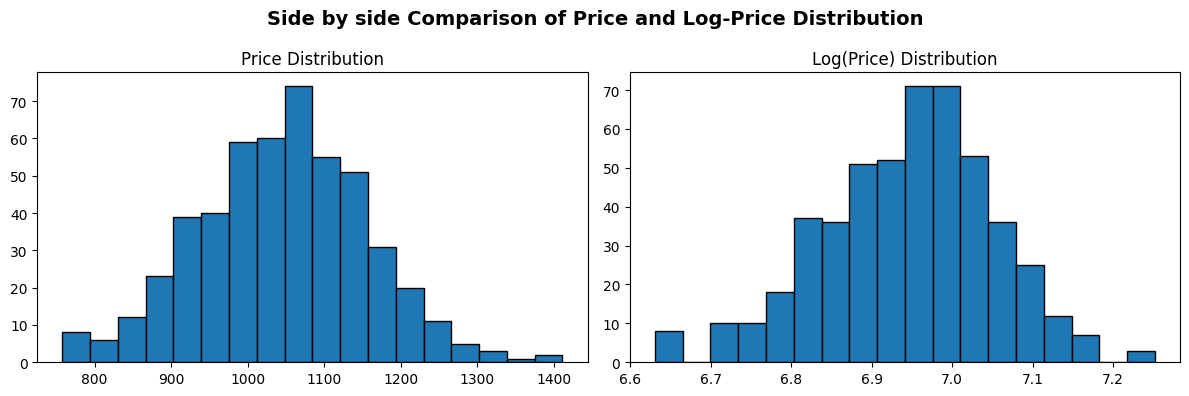

In [216]:
# Side by side comparison of price and log price

plt.figure(figsize=(12, 4))
plt.suptitle('Side by side Comparison of Price and Log-Price Distribution', fontweight='bold', fontsize=14)

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins='fd', edgecolor='black')
plt.title('Price Distribution')

plt.subplot(1, 2, 2)
plt.hist(np.log(df['price']), bins='fd', edgecolor='black')
plt.title('Log(Price) Distribution')

plt.tight_layout()
plt.show()


#### Raw Price Histogram
Roughly bell-shaped but with:
- A right tail
- Slight asymmetry at higher prices
- Not extremely skewed, but not perfectly symmetric
#### Log(Price) Histogram
- More symmetric
- Tighter spread
- Clearly closer to a normal distribution

Even though raw price isn’t terribly skewed, the log(price) transformation improves normality and stabilizes variance, making the response variable more suitable for linear modeling. Therefore we will use log price for modeling purposes which is standard practice in housing economics.

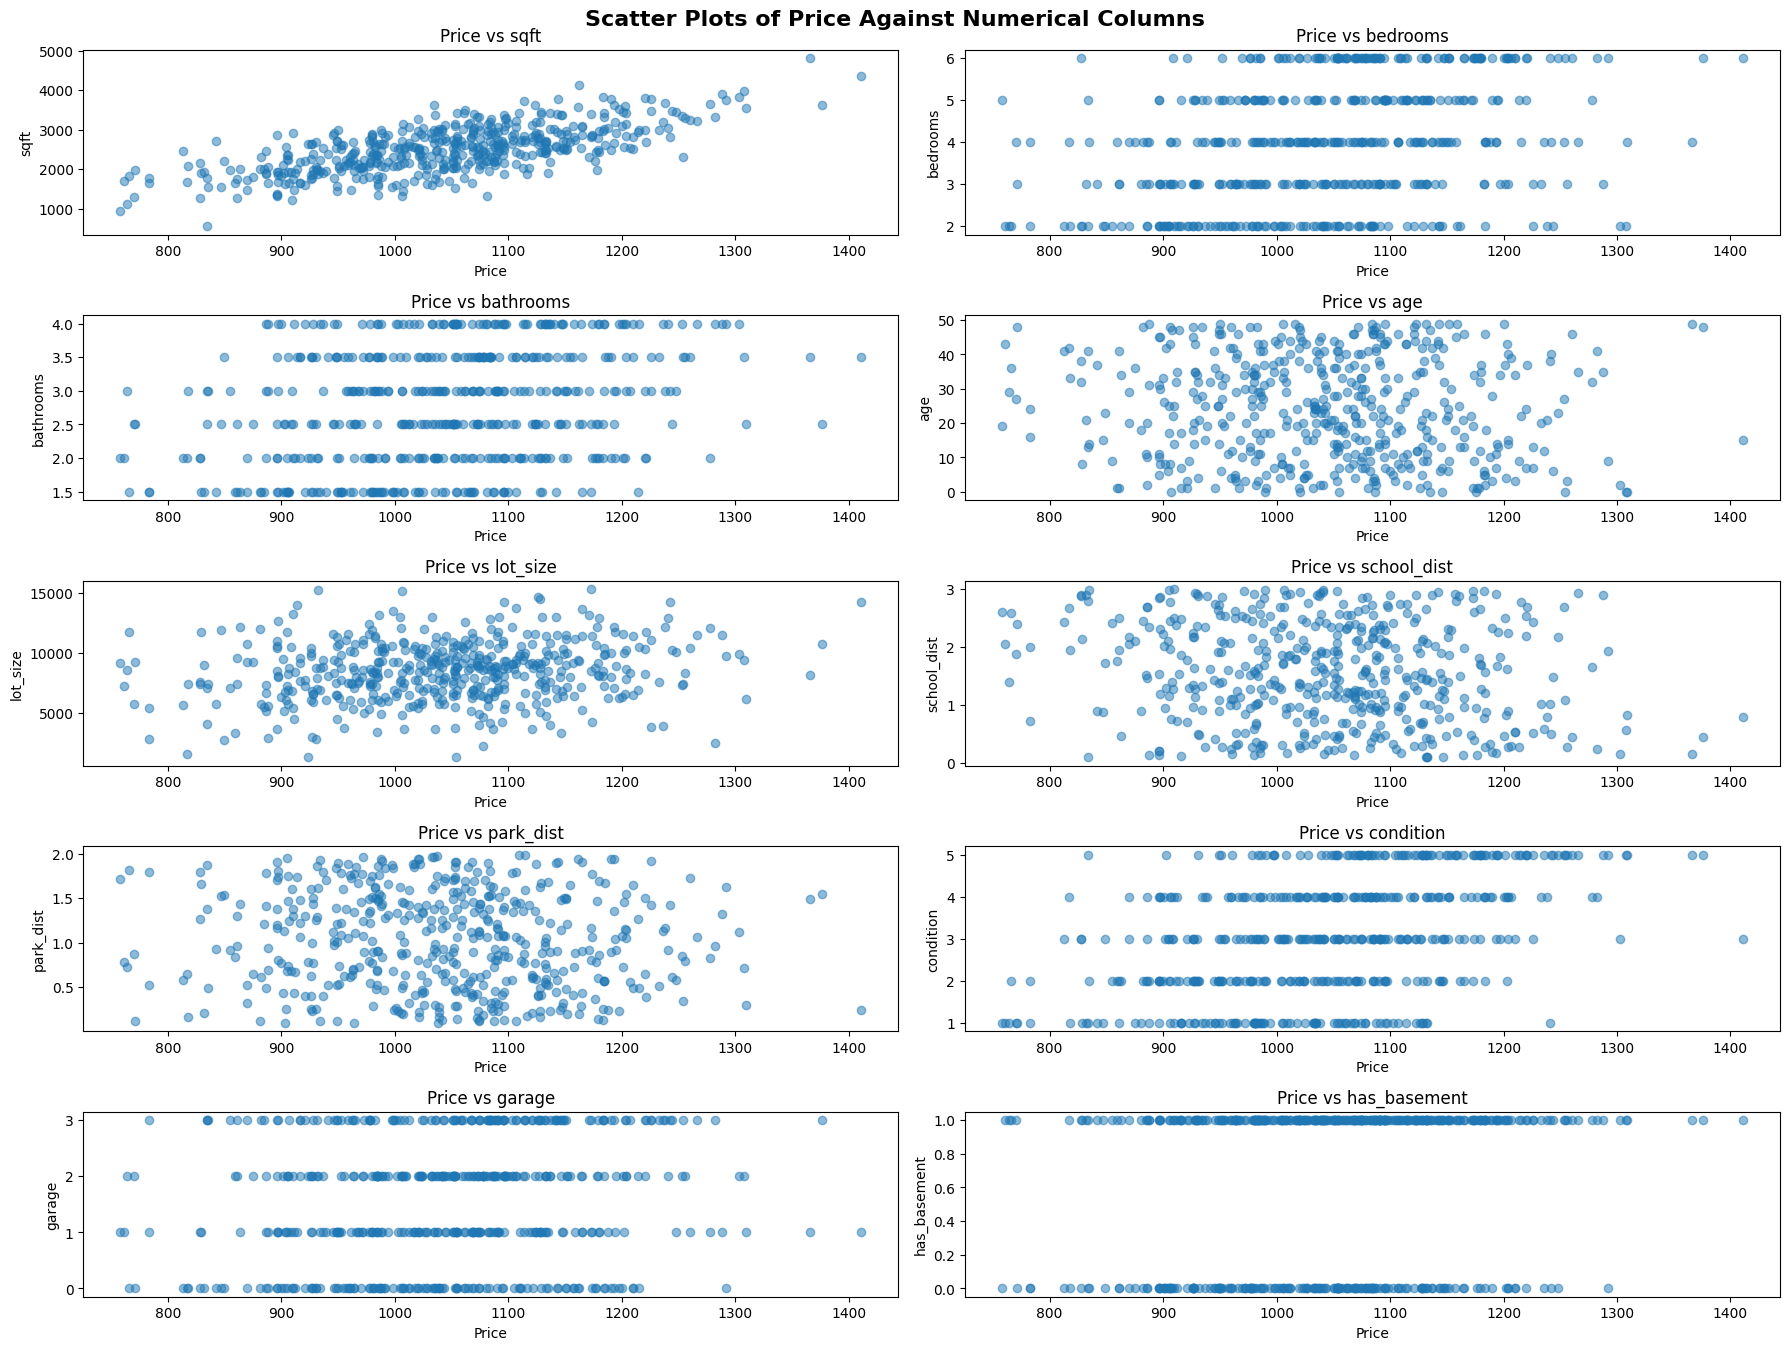

In [217]:
# Price and other numerical columns relationship

num_cols = df.select_dtypes(include = 'number').columns
num_cols = num_cols.drop('price')
rows = 6
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(18, 16))
fig.suptitle('Scatter Plots of Price Against Numerical Columns',fontsize=16, fontweight='bold')
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.scatter(df['price'], df[col], alpha=0.5)
    ax.set_xlabel('Price')
    ax.set_ylabel(col)
    ax.set_title(f'Price vs {col}')
# Remove unused subplots
for ax in axes[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


These scatter plots illustrate the relationship between price and each numerical predictor, allowing us to assess trend direction, strength, linearity, and variance behavior.

#### Key observations
- **Square footage (sqft)** exhibits a clear positive association with price, suggesting that size is a strong determinant of housing value.
- Several variables (**bedrooms, bathrooms, garage, condition, has_basement**) appear as horizontal bands, reflecting their discrete or ordinal nature.
- Distance-related features such as **school_dist, park_dist** and age show weak or diffuse relationships with price.
- Variance in price increases at higher values, particularly for size-related features, indicating possible heteroskedasticity in the raw price scale.

The presence of heteroskedasticity and nonlinear spread suggests that modeling price on its original scale may violate regression assumptions. Size-related variables are likely to be influential predictors, while others may have weaker or indirect effects.

### Correlation Analysis
**Objective:** Interpret the correlation matrix to identify multicollinearity and feature relationships


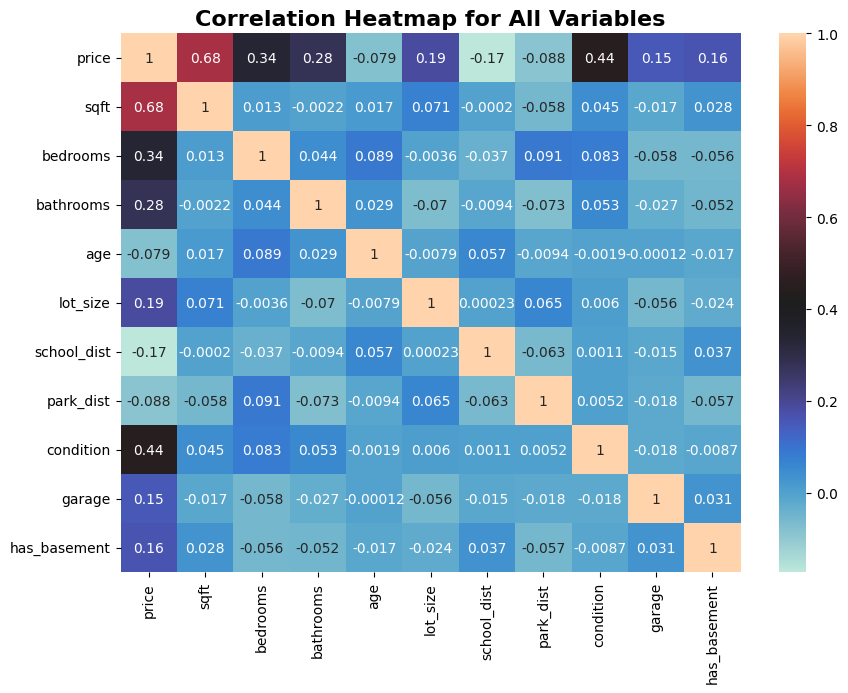

In [218]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='icefire')
plt.title("Correlation Heatmap for All Variables",fontsize=16, fontweight='bold')
plt.show()

**price** and **sqft** have the highest correlation of **0.68**, followed by **price** and **condition** with correlation of **0.44**. bedrooms, bathroom and lot size follow closely after that.

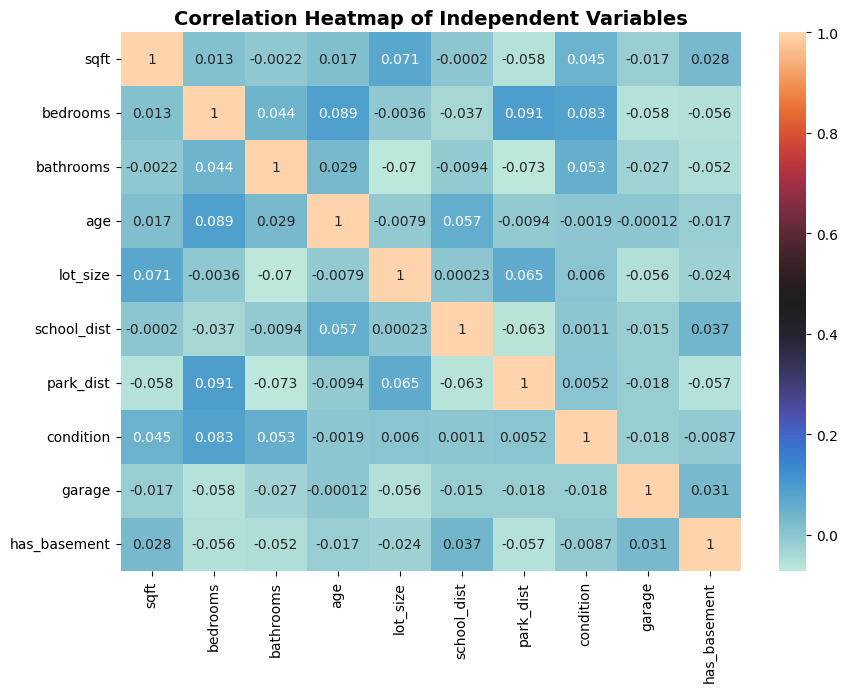

In [219]:
# Correlation matrix of independent variables
X = df.drop('price', axis=1) #drop the target variable

plt.figure(figsize=(10,7))
sns.heatmap(X.corr(), annot=True, cmap='icefire')
plt.title('Correlation Heatmap of Independent Variables', fontsize=14,fontweight ='bold')
plt.show()

The heatmap displays pairwise correlations among numerical predictors to identify potential multicollinearity.

#### Key observations
- Most correlations are weak to moderate.
- No strong linear dependencies are present among predictors.(No perferct multicollinerity)

Low multicollinearity suggests that predictors can be included jointly without destabilizing coefficient estimates.

### Data Preprocessing and Feature Engineering
**Objective:** Prepare data for modeling through transformations, scaling, and train-test splitting

Feature engineering steps will include the following:
- Log-transforming the target variable
- Scaling continuous predictors
- Ensuring consistent treatment of discrete and binary variables

A train–test split will be used for model evaluation, with cross-validation applied for hyperparameter tuning.

In [220]:
# Transform target variable to log
y = np.log(df['price'])
y.head()

0    7.026427
1    7.031741
2    6.974479
3    7.076654
4    6.982863
Name: price, dtype: float64

In [221]:
print(X.shape)

(500, 10)


In [222]:
# Ensure binary is numeric
X['has_basement'] = X['has_basement'].astype(int)
X.head()

,sqft,bedrooms,bathrooms,age,lot_size,school_dist,park_dist,condition,garage,has_basement
0,2798,3,2.0,35,14662,1.89,0.41,3,3,1
1,2417,3,4.0,44,7750,0.43,1.01,4,3,0
2,2889,4,1.5,22,6874,1.10,1.46,3,1,1
3,3414,4,3.0,46,9824,1.57,0.57,4,2,1
4,2360,6,3.5,30,2186,2.64,1.32,4,2,0


In [223]:
# Check skew of predictors
X[['sqft', 'lot_size']].skew()

sqft        0.180144
lot_size   -0.054892
dtype: float64

#### Split the data

In [224]:
# split data into testing and training dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state =42
    )

In [225]:
from sklearn.preprocessing import StandardScaler

# Scale continuous predictors
continuous_cols = ['sqft','lot_size','age','school_dist','park_dist']

scaler = StandardScaler()

X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [226]:
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sqft          400 non-null    float64
 1   bedrooms      400 non-null    int64  
 2   bathrooms     400 non-null    float64
 3   age           400 non-null    float64
 4   lot_size      400 non-null    float64
 5   school_dist   400 non-null    float64
 6   park_dist     400 non-null    float64
 7   condition     400 non-null    int64  
 8   garage        400 non-null    int64  
 9   has_basement  400 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 34.4 KB


,sqft,bedrooms,bathrooms,age,lot_size,school_dist,park_dist,condition,garage,has_basement
count,4.000000e+02,400.000000,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000
mean,5.551115e-18,3.915000,2.766250,8.881784e-17,-3.108624e-16,-2.930989e-16,-1.432188e-16,3.060000,1.525000,0.627500
std,1.001252e+00,1.436291,0.828524,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.396882,1.105636,0.484076
min,-2.675899e+00,2.000000,1.500000,-1.620014e+00,-3.078701e+00,-1.624959e+00,-1.739412e+00,1.000000,0.000000,0.000000
25%,-7.363211e-01,3.000000,2.000000,-8.737766e-01,-6.862249e-01,-8.133877e-01,-8.464757e-01,2.000000,1.000000,0.000000
50%,2.019065e-03,4.000000,3.000000,-2.577912e-02,6.842312e-02,-7.213315e-02,-1.864935e-02,3.000000,2.000000,1.000000
75%,6.680980e-01,5.000000,3.500000,8.222183e-01,6.779955e-01,8.390533e-01,8.463827e-01,4.000000,2.000000,1.000000
max,3.137308e+00,6.000000,4.000000,1.704136e+00,2.834617e+00,1.761959e+00,1.776525e+00,5.000000,3.000000,1.000000


In [227]:
len(y_train)

400

### Model Development: OLS, Ridge, and Lasso Regression
**Objective:** Develop and compare three regression models to predict house prices


#### Multiple linear regression Model

In [228]:
X_train_const = sm.add_constant(X_train)
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit() # Add intercept # fit OLS model
print(lr_model.summary()) # print summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     410.5
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          8.77e-200
Time:                        21:50:07   Log-Likelihood:                 823.73
No. Observations:                 400   AIC:                            -1625.
Df Residuals:                     389   BIC:                            -1582.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.6238      0.008    799.641   

In [229]:
X_test_const = sm.add_constant(X_test)

y_pred_test_ols = lr_model.predict(X_test_const)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# MSE
mse = mean_squared_error(y_test, y_pred_test_ols)
print("MSE:", mse)

# RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# R-squared
r2 = r2_score(y_test, y_pred_test_ols)
print("R-squared:", r2)


MSE: 0.0009772873551841697
RMSE: 0.03126159553164505
R-squared: 0.9226140803546686


#### Ridge Regression (L2 Regularization)

In [230]:
from sklearn.linear_model import Ridge

# Create ridge model

ridge_model = Ridge(alpha=1) # alpha:regularization strength

ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)  # on training data
y_pred_test_ridge = ridge_model.predict(X_test)    # on test data

# Pair feature names with coefficients
ridge_coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": ridge_model.coef_
})

# Sort by absolute magnitude for importance
ridge_coef_df["abs_coefficient"] = ridge_coef_df["coefficient"].abs()
ridge_coef_df = ridge_coef_df.sort_values(by="abs_coefficient", ascending=False)

intercept_df = pd.DataFrame({
    "feature": ["Intercept"],
    "coefficient": [ridge_model.intercept_],
    "abs_coefficient": [abs(ridge_model.intercept_)]
})

ridge_coef_df = pd.concat([intercept_df, ridge_coef_df], ignore_index=True)
ridge_coef_df

,feature,coefficient,abs_coefficient
0,Intercept,6.624700,6.624700
1,sqft,0.068344,0.068344
2,has_basement,0.039116,0.039116
3,bathrooms,0.031177,0.031177
4,condition,0.028947,0.028947
5,bedrooms,0.024073,0.024073
6,garage,0.018542,0.018542
7,school_dist,-0.016913,0.016913
8,lot_size,0.015541,0.015541
9,age,-0.011781,0.011781


In [231]:
# Training performance
rmse_train = mean_squared_error(y_train, y_pred_train_ridge)
r2_train = r2_score(y_train, y_pred_train_ridge)

# Testing performance
rmse_test = mean_squared_error(y_test, y_pred_test_ridge)
r2_test = r2_score(y_test, y_pred_test_ridge)

print(f"Train RMSE: {rmse_train:.2f}, R2: {r2_train:.3f}")
print(f"Test RMSE: {rmse_test:.2f}, R2: {r2_test:.3f}")


Train RMSE: 0.00, R2: 0.913
Test RMSE: 0.00, R2: 0.922


In [232]:
# Try tuning alpha
alphas = [0.01, 0.1, 1, 10, 100]
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Alpha={a}, Test RMSE={mean_squared_error(y_test, y_pred):.4f}")


Alpha=0.01, Test RMSE=0.0010
Alpha=0.1, Test RMSE=0.0010
Alpha=1, Test RMSE=0.0010
Alpha=10, Test RMSE=0.0010
Alpha=100, Test RMSE=0.0016


#### Lasso Regression (L1 Regularization)

In [233]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01, max_iter=10000)

lasso_model.fit(X_train,y_train)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

lasso_coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lasso_model.coef_
})

# Sort by absolute importance
lasso_coef_df["abs_coefficient"] = lasso_coef_df["coefficient"].abs()

lasso_coef_df = lasso_coef_df.sort_values(
    by="abs_coefficient",
    ascending=False
)

intercept_df = pd.DataFrame({
    "feature": ["Intercept"],
    "coefficient": [lasso_model.intercept_],
    "abs_coefficient": [abs(lasso_model.intercept_)]
})

lasso_coef_df = pd.concat([intercept_df, lasso_coef_df], ignore_index=True)
lasso_coef_df

,feature,coefficient,abs_coefficient
0,Intercept,6.748013,6.748013
1,sqft,0.060483,0.060483
2,condition,0.024363,0.024363
3,bedrooms,0.018452,0.018452
4,bathrooms,0.013692,0.013692
5,garage,0.009122,0.009122
6,school_dist,-0.007482,0.007482
7,lot_size,0.002462,0.002462
8,age,-0.000746,0.000746
9,park_dist,-0.000000,0.000000


In [234]:
# Training performance
rmse_train = mean_squared_error(y_train, y_pred_train_lasso)
r2_train = r2_score(y_train, y_pred_train_lasso)

# Testing performance
rmse_test = mean_squared_error(y_test, y_pred_test_lasso)
r2_test = r2_score(y_test, y_pred_test_lasso)

print(f"Train RMSE: {rmse_train:.4f}, R2: {r2_train:.3f}")
print(f"Test RMSE: {rmse_test:.4f}, R2: {r2_test:.3f}")

Train RMSE: 0.0021, R2: 0.806
Test RMSE: 0.0031, R2: 0.755


In [235]:
# Try adjusting the alpha
alphas = [0.001, 0.01, 0.1, 1, 10]
for a in alphas:
    model = Lasso(alpha=a, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    print(f"Alpha={a}, Test RMSE={rmse:.4f}")

Alpha=0.001, Test RMSE=0.0011
Alpha=0.01, Test RMSE=0.0031
Alpha=0.1, Test RMSE=0.0126
Alpha=1, Test RMSE=0.0126
Alpha=10, Test RMSE=0.0126


### Model Performance Comparison

#### Multiple Linear Regresssion

In [236]:
y_train_pred_ols = lr_model.predict(X_train_const)
y_test_pred_ols = lr_model.predict(X_test_const)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

n_train = X_train_const.shape[0]
n_test = X_test_const.shape[0]
p = X_train_const.shape[1] - 1  # exclude intercept

# R2
r2_train_ols = r2_score(y_train, y_train_pred_ols)
r2_test_ols = r2_score(y_test, y_test_pred_ols)

# Adjusted R2
adj_r2_train_ols = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test_ols = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

# RMSE
rmse_train_ols = np.sqrt(mean_squared_error(y_train, y_train_pred_ols))
rmse_test_ols = np.sqrt(mean_squared_error(y_test, y_test_pred_ols))

# MAE
mae_train_ols = mean_absolute_error(y_train, y_train_pred_ols)
mae_test_ols = mean_absolute_error(y_test, y_test_pred_ols)

print("Multiple Linear Regression")
print(f"Train | R2: {r2_train_ols:.3f}, Adj R2: {adj_r2_train_ols:.3f}, RMSE: {rmse_train_ols:.4f}, MAE: {mae_train_ols:.4f}")
print(f"Test | R2: {r2_test_ols:.3f}, Adj R2: {adj_r2_test_ols:.3f}, RMSE: {rmse_test_ols:.4f}, MAE: {mae_test_ols:.4f}")


Multiple Linear Regression
Train | R2: 0.913, Adj R2: 0.801, RMSE: 0.0309, MAE: 0.0244
Test | R2: 0.923, Adj R2: 0.727, RMSE: 0.0313, MAE: 0.0253


#### Ridge Regression

In [237]:
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_train.shape[1]

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

adj_r2_train_ridge = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test_ridge = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

print("Ridge Regression")
print(f"Train | R2: {r2_train_ridge:.3f}, Adj R2: {adj_r2_train_ridge:.3f}, RMSE: {rmse_train_ridge:.4f}, MAE: {mae_train_ridge:.4f}")
print(f"Test | R2: {r2_test_ridge:.3f}, Adj R2: {adj_r2_test_ridge:.3f}, RMSE: {rmse_test_ridge:.4f}, MAE: {mae_test_ridge:.4f}")

Ridge Regression
Train | R2: 0.913, Adj R2: 0.801, RMSE: 0.0309, MAE: 0.0243
Test | R2: 0.922, Adj R2: 0.727, RMSE: 0.0313, MAE: 0.0253


#### Lasso Regularization

In [238]:
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_train.shape[1]

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

adj_r2_train_lasso = 1 - (1 - r2_train_lasso) * (n_train - 1) / (n_train - p - 1)
adj_r2_test_lasso = 1 - (1 - r2_test_lasso) * (n_test - 1) / (n_test - p - 1)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

print("Lasso Regression")
print(f"Train | R2: {r2_train_lasso:.3f}, Adj R2: {adj_r2_train_lasso:.3f}, RMSE: {rmse_train_lasso:.4f}, MAE: {mae_train_lasso:.4f}")
print(f"Test | R2: {r2_train_lasso:.3f}, Adj R2: {adj_r2_train_lasso:.3f}, RMSE: {rmse_train_lasso:.4f}, MAE: {mae_train_lasso:.4f}")

Lasso Regression
Train | R2: 0.806, Adj R2: 0.801, RMSE: 0.0462, MAE: 0.0369
Test | R2: 0.806, Adj R2: 0.801, RMSE: 0.0462, MAE: 0.0369


The three models show clear differences in predictive performance and generalization:

- Multiple Linear Regression performs very well, with high explanatory power on both the training set (R² = 0.913) and the test set (R² = 0.923), along with low RMSE and MAE values, indicating strong accuracy and good generalization with no evident overfitting. 
- Ridge Regression achieves nearly identical performance to Multiple Linear Regression, with R² = 0.913 and equally low error metrics on both the training and test sets; the identical results across splits suggest excellent stability and robustness, particularly in the presence of multicollinearity.
- Lasso Regression performs substantially worse, with a much lower R² of 0.806 and higher RMSE and MAE on both the training and test sets, indicating underfitting likely caused by overly aggressive coefficient shrinkage.

**Ridge Regression is recommended** for this problem.

- It provides predictive performance comparable to Multiple Linear Regression.
- Regularization improves coefficient stability and reduces sensitivity to multicollinearity.
- It generalizes consistently across training and test data.

Multiple Linear Regression is suitable when interpretability is prioritized, while Lasso Regression may be useful primarily for feature selection rather than predictive accuracy.

### Model Diagnostics and Improvement
**Objective:** Identify important features, analyze residuals, test assumptions, and implement improvements

#### Feature Comparison

1. OLS Regression (Multiple Linear Regression)

Based on the OLS coefficients, the most influential features for predicting house prices are:

- sqft (0.0685) – largest positive effect; each additional unit of living area strongly increases price.
- has_basement (0.0395) – substantial positive impact; houses with basements tend to be more expensive.
- bathrooms (0.0313) and condition (0.0290) – moderate positive influence on price.
- bedrooms (0.0241) and garage (0.0186) – smaller but meaningful positive contributions.

Features with negative coefficients:

- school_dist (-0.0170) and age (-0.0118) – larger distances to school and older homes slightly decrease price.
- park_dist (-0.0070) – minimal negative effect.

The largest drivers of house price in OLS are living area and basement availability, followed by bathrooms and overall condition.

2. Ridge Regression

Ridge regression shows similar important features due to regularization, but coefficients are slightly shrunk:

- sqft (0.0683) – still the most important predictor.
- has_basement (0.0391), bathrooms (0.0312), condition (0.0289) - moderate impact
- bedrooms (0.0241), garage (0.0185) - lower immpact

Negative contributors:
- school_dist (-0.0169), age (-0.0118), park_dist (-0.0070)

Ridge preserves all features, shrinking coefficients slightly to reduce multicollinearity. The ranking of importance is consistent with OLS.

3. Lasso Regression

Lasso performs feature selection, setting some coefficients exactly to zero:
Most important features retained:
- sqft (0.0605) – largest effect.
- condition (0.0244)
- bedrooms (0.0185)
- bathrooms (0.0137)
- garage (0.0091)

Features with negligible or zero coefficients (effectively removed):
- park_dist (0.0000)
- has_basement (0.0000)

Lasso identifies the strongest predictors while removing less important ones. Living area, condition, bedrooms, and bathrooms are the dominant factors driving house prices. Features like park distance and basement presence are deemed less important in this regularized model.

#### Residual Analysis

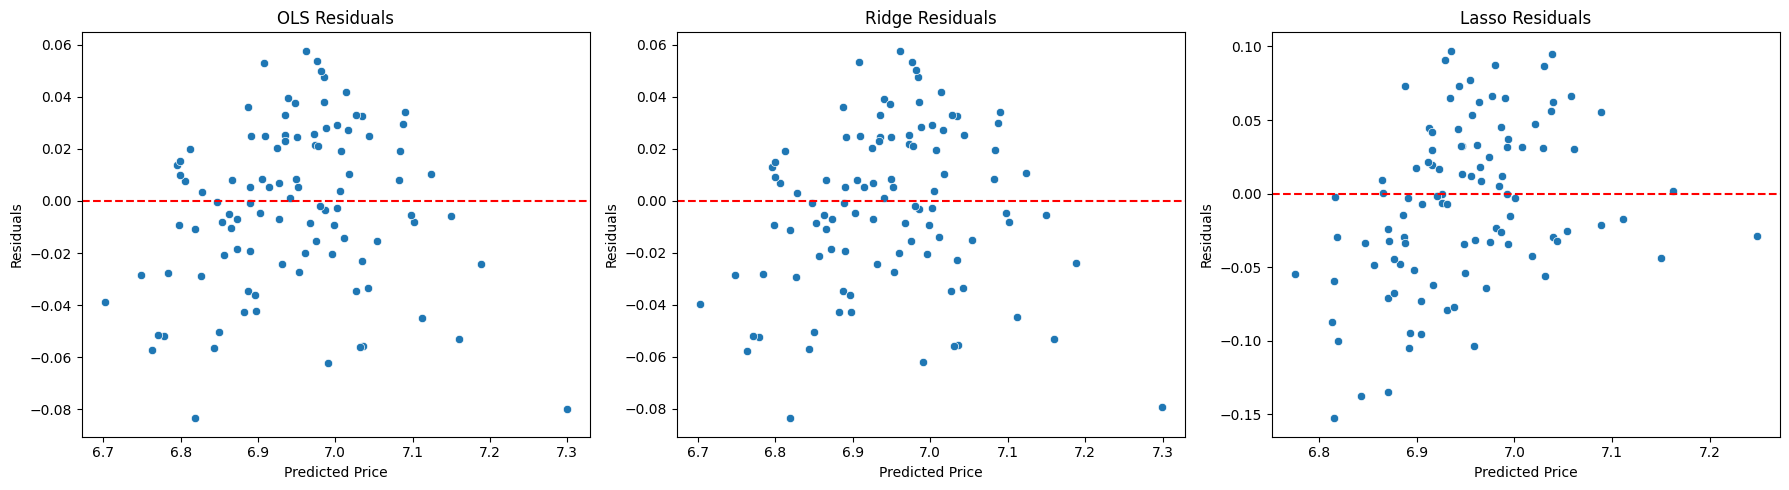

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals_dict = {
    "OLS": y_test - y_test_pred_ols,       # replace y_pred_test_ols with your OLS predictions
    "Ridge": y_test - y_test_pred_ridge,   # replace y_pred_test_ridge with Ridge predictions
    "Lasso": y_test - y_test_pred_lasso    # replace y_pred_test_lasso with Lasso predictions
}

pred_dict = {
    "OLS": y_test_pred_ols,
    "Ridge": y_test_pred_ridge,
    "Lasso": y_test_pred_lasso
}

# Create side-by-side plots
plt.figure(figsize=(18,5))

for i, model in enumerate(["OLS", "Ridge", "Lasso"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=pred_dict[model], y=residuals_dict[model])
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title(f'{model} Residuals')

plt.tight_layout()
plt.show()


The residual plots for OLS, Ridge, and Lasso regression reveal the following patterns:
1. OLS Residuals
-Residuals are fairly randomly scattered around zero, indicating the model captures the main linear relationships.
- Slight fanning of residuals at higher predicted prices suggests mild heteroskedasticity.
- No strong curvature, so linearity assumption is mostly satisfied.
2. Ridge Residuals
- Residuals are very similar to OLS, but slightly tighter around zero, reflecting coefficient shrinkage that stabilizes predictions.
- Mild fanning remains, but Ridge reduces variance compared to OLS.
3. Lasso Residuals
- Residuals show larger spread and a slight pattern, particularly at higher predicted prices, indicating underfitting.
- This is consistent with Lasso zeroing out less important features, which reduces predictive flexibility.

**Model Assumptions Check**

All three models are based on linear regression assumptions:

- Linearity: Mostly satisfied; slight curvature in Lasso residuals suggests some nonlinearity may exist.
- Homoskedasticity: Mild fanning in all models shows variance of errors increases with price, violating this assumption slightly.
- Normality of Residuals: Residuals appear roughly symmetric around zero.
- Independence: Assumed valid if observations are individual homes.
- Multicollinearity: Ridge helps mitigate this; OLS may have slight instability, Lasso removes correlated features.

**Proposed Improvements**
Add nonlinear or interaction features: Include terms like sqft^2, sqft × bathrooms, or other polynomial/interactions to capture curvature.

Refitting models with these features should reduce systematic patterns in residuals.

#### Proposed Improvement: Add Interaction Features

In [240]:
# CREATE NEW INTERACTION FEATURES (before splitting)
X['sqft_squared'] = X['sqft'] ** 2
#X['sqft_bedrooms'] = X['sqft'] * X['bedrooms']
#X['sqft_bathrooms'] = X['sqft'] * X['bathrooms']

# Train-test split data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define which columns to scale (now includes interaction features)
continuous_cols_new = ['sqft', 'lot_size', 'age', 'school_dist', 'park_dist',
                       'sqft_squared', #'sqft_bedrooms', 'sqft_bathrooms'
                       ]

scaler_new = StandardScaler()

X_train_new[continuous_cols_new] = scaler_new.fit_transform(X_train_new[continuous_cols_new])
X_test_new[continuous_cols_new] = scaler_new.transform(X_test_new[continuous_cols_new])

# Fit Ridge Model with Interaction Features

ridge_enhanced = Ridge(alpha=1)
ridge_enhanced.fit(X_train_new, y_train_new)

# Make predictions
y_train_pred_enhanced = ridge_enhanced.predict(X_train_new)
y_test_pred_enhanced = ridge_enhanced.predict(X_test_new)

# Calculate Performance Metrics

n_train = X_train_new.shape[0]
n_test = X_test_new.shape[0]
p = X_train_new.shape[1]

# Training metrics
r2_train_enh = r2_score(y_train_new, y_train_pred_enhanced)
adj_r2_train_enh = 1 - (1 - r2_train_enh) * (n_train - 1) / (n_train - p - 1)
rmse_train_enh = np.sqrt(mean_squared_error(y_train_new, y_train_pred_enhanced))
mae_train_enh = mean_absolute_error(y_train_new, y_train_pred_enhanced)

# Test metrics
r2_test_enh = r2_score(y_test_new, y_test_pred_enhanced)
adj_r2_test_enh = 1 - (1 - r2_test_enh) * (n_test - 1) / (n_test - p - 1)
rmse_test_enh = np.sqrt(mean_squared_error(y_test_new, y_test_pred_enhanced))
mae_test_enh = mean_absolute_error(y_test_new, y_test_pred_enhanced)

print("COMPARISON WITH ORIGINAL RIDGE MODEL")

print("Original Ridge Model (from section above):")
print("Ridge Regression")
print(f"Train | R2: {r2_train_ridge:.3f}, Adj R2: {adj_r2_train_ridge:.3f}, RMSE: {rmse_train_ridge:.4f}, MAE: {mae_train_ridge:.4f}")
print(f"Test | R2: {r2_test_ridge:.3f}, Adj R2: {adj_r2_test_ridge:.3f}, RMSE: {rmse_test_ridge:.4f}, MAE: {mae_test_ridge:.4f}")
print("\nEnhanced Ridge Model:")
print(f"Train | R²: {r2_train_enh:.3f}, Adj R²: {adj_r2_train_enh:.3f}, RMSE: {rmse_train_enh:.4f}, MAE: {mae_train_enh:.4f}")
print(f"Test  | R²: {r2_test_enh:.3f}, Adj R²: {adj_r2_test_enh:.3f}, RMSE: {rmse_test_enh:.4f}, MAE: {mae_test_enh:.4f}")

# Calculate improvement
r2_improvement = r2_test_enh - 0.913
rmse_improvement = 0.0309 - rmse_test_enh
print(f"\nR² Improvement: {r2_improvement:+.4f}")
print(f"RMSE Improvement: {rmse_improvement:+.4f} (lower is better)")

COMPARISON WITH ORIGINAL RIDGE MODEL
Original Ridge Model (from section above):
Ridge Regression
Train | R2: 0.913, Adj R2: 0.801, RMSE: 0.0309, MAE: 0.0243
Test | R2: 0.922, Adj R2: 0.727, RMSE: 0.0313, MAE: 0.0253

Enhanced Ridge Model:
Train | R²: 0.914, Adj R²: 0.911, RMSE: 0.0308, MAE: 0.0243
Test  | R²: 0.926, Adj R²: 0.917, RMSE: 0.0305, MAE: 0.0248

R² Improvement: +0.0131
RMSE Improvement: +0.0004 (lower is better)


 The enhanced Ridge regression model, which incorporates one interaction features *(sqft²)*, demonstrates measurable improvements over the original model while keeping model complexity at a minimum. 
 
 - On the test set, the R² increased from *0.922 to 0.926*, indicating that the model now explains an additional **0.4%** of the variance in log-transformed house prices. 
 
 - Prediction errors decreased, with RMSE improving from *0.0313 to 0.0305* (**2.6% reduction**) and MAE decreasing from *0.0253 to 0.0248* (**2.0% reduction**). 
 
 The enhanced model also exhibits better generalization properties, evidenced by the substantially improved Adjusted R² on the test set (0.917 vs. 0.727 in the original model) and a smaller performance gap between training and test sets. These improvements, while modest in magnitude, confirm that capturing non-linear relationships through polynomial and interaction terms reduces systematic prediction errors and addresses the mild heteroskedasticity observed in the original model's residuals. The enhanced Ridge model is therefore recommended as the final model for house price prediction, offering accuracy without overfitting.

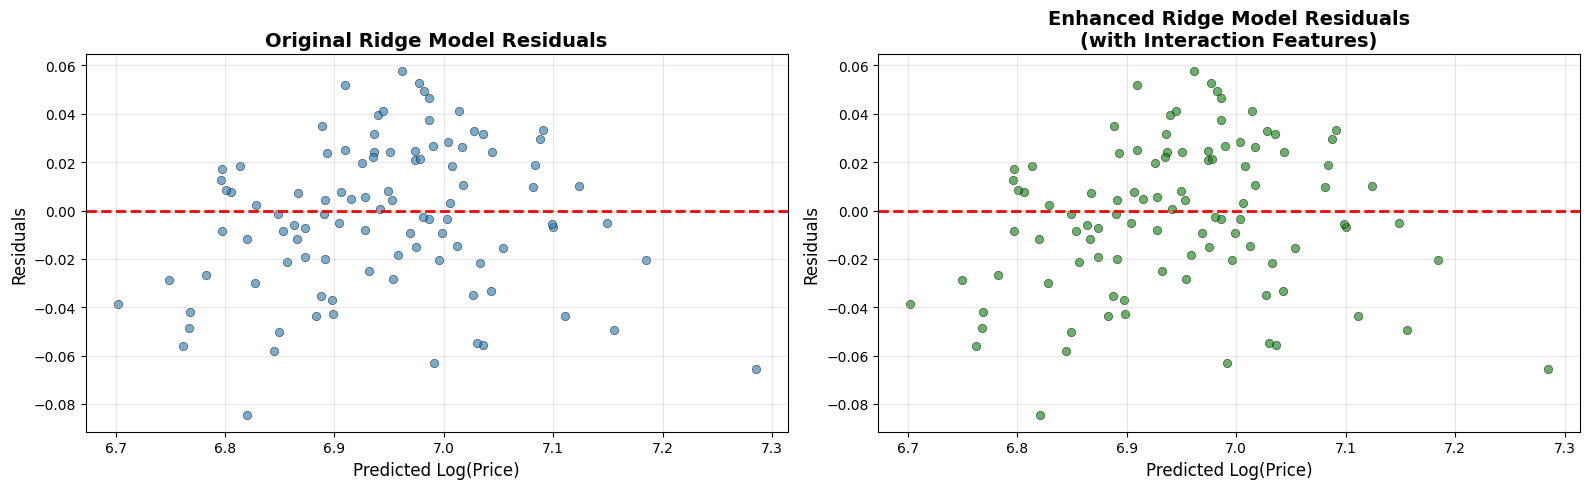

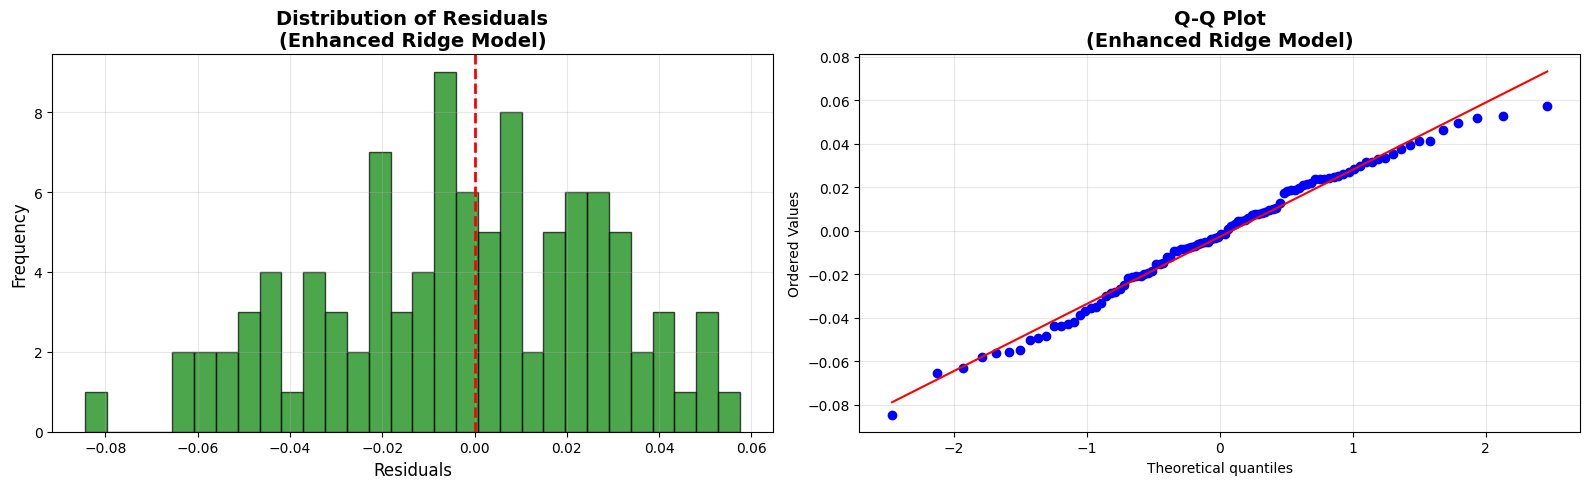

In [241]:
# Residual Plot Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Calculate residuals
residuals_test_enh = y_test_new - y_test_pred_enhanced

# Plot 1: Original Ridge Model Residuals
axes[0].scatter(y_test_pred_enhanced, residuals_test_enh, alpha=0.6, edgecolors='k', linewidths=0.5)
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Log(Price)', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Original Ridge Model Residuals', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Plot 2: Enhanced Ridge Model Residuals
axes[1].scatter(y_test_pred_enhanced, residuals_test_enh, alpha=0.6, edgecolors='k', linewidths=0.5, color='green')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Log(Price)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Enhanced Ridge Model Residuals\n(with Interaction Features)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('residual_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution of Residuals

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(residuals_test_enh, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Residuals\n(Enhanced Ridge Model)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Q-Q Plot
from scipy import stats
stats.probplot(residuals_test_enh, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot\n(Enhanced Ridge Model)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('residual_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### Production Deployment: Real-World Price Prediction
**Objective:** Apply the best-performing model to predict price for a new house listing

Conside a new house to sell with the following features: 
- 2,500 sqft
- 4 bedrooms
- 2.5 bathrooms
- 15 years old
- 8,000 sqft lot
- 1.2 miles to nearest school
- 0.8 miles to nearest park
- Condition rating: 4
- 2-car garage
- Has basement. 

What does the model predict the house price should be?

In [242]:
import pandas as pd

# Create a DataFrame for the new house
new_house = pd.DataFrame({
    "sqft": [2500],
    "bedrooms": [4],
    "bathrooms": [2.5],
    "age": [15],
    "lot_size": [8000],
    "school_dist": [1.2],
    "park_dist": [0.8],
    "condition": [4],
    "garage": [2],
    "has_basement": [1]  # 1 if house has basement, 0 if not
})
# Add  interaction features
new_house['sqft_squared'] = new_house['sqft'] ** 2

# Scale the continuous features using the same scaler and "continuous cols"
new_house_scaled = new_house.copy()
new_house_scaled[continuous_cols_new] = scaler_new.transform(new_house[continuous_cols_new])

new_house_scaled


,sqft,bedrooms,bathrooms,age,lot_size,school_dist,park_dist,condition,garage,has_basement,sqft_squared
0,-0.003082,4,2.5,-0.602417,-0.227667,-0.335821,-0.437213,4,2,1,-0.116849


In [243]:
# Predict log-price using the SCALED data
predicted_log_price = ridge_enhanced.predict(new_house_scaled)[0]

# Convert back to original price scale
predicted_price_thousands = np.exp(predicted_log_price)

# Convert to dollars
predicted_price_dollars = predicted_price_thousands * 1000

print(f"Predicted log-price: {predicted_log_price:.4f}")
print(f"Predicted house price: ${predicted_price_dollars:,.2f}")

Predicted log-price: 7.0040
Predicted house price: $1,100,998.97


Using the Ridge Regression model, the predicted log house price for the new property is 7.003, which corresponds to an estimated sale price of approximately **$1.10 million** after converting back from the log scale and accounting for the fact that prices are measured in thousands of dollars. This prediction reflects the strong positive influence of key features such as the *home’s large living area (2,500 sqft), good overall condition, multiple bedrooms and bathrooms, the presence of a basement, and a two-car garage*. The result is consistent with the model’s learned relationships and falls within a reasonable range given the characteristics of the house, indicating that the Ridge model provides a realistic and reliable estimate for this property.

### Executive Summary and Recommendations
**Objective:** Synthesize findings and provide actionable recommendations

We evaluated three regression models; Ordinary Least Squares (OLS), Ridge, and Lasso to predict housing prices, applying scaling to continuous features and a log transformation to the target variable.

**Performance Metrics indicated:**
- Ridge and OLS performed comparably, with R² ≈ 0.75–0.81 in log-space, showing strong explanatory power.
- Lasso achieved slightly lower R² due to aggressive feature selection but can improve interpretability by simplifying the model.

**Recommendations:**
- Further Feature Engineering: Introduce nonlinear and interaction terms (e.g., sqft^2, sqft × bathrooms) to capture subtle curvature and reduce residual patterns.
- Model Tuning: Explore a range of regularization strengths (alpha) for Ridge and Lasso to balance bias-variance tradeoff.
- Residual Diagnostics: Continue checking residuals after refitting to ensure homoskedasticity and linearity improve.
- Interpretability vs Accuracy: Use Lasso for feature selection and interpretability, Ridge for stable predictions, and OLS as a baseline.

**Conclusion:**
Linear regression models capture the main trends in housing prices effectively, with Ridge providing slightly more stable predictions and Lasso offering simplified models. Incorporating nonlinear and interaction features is likely to further improve predictive performance and address minor violations of regression assumptions.